In [59]:
import pandas as pd
import numpy as np

In [60]:
df= pd.read_csv("train (1).csv")
test= pd.read_csv("test.csv")

In [61]:
print(df.shape, test.shape)

(8693, 14) (4277, 13)


In [62]:
df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [63]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [64]:
df.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000

In [65]:
df.describe(include=object)

PassengerId HomePlanet CryoSleep    Cabin  Destination    VIP  \
count         8693       8492      8476     8494         8511   8490   
unique        8693          3         2     6560            3      2   
top        0001_01      Earth     False  G/734/S  TRAPPIST-1e  False   
freq             1       4602      5439        8         5915   8291   

                  Name  
count             8493  
unique            8473  
top     Gollux Reedall  
freq                 2

COLUMN SUMMARY

In [66]:
def column_summary(df):
    summary = pd.DataFrame()
    
    summary['Column Name'] = df.columns
    summary['Data Type'] = df.dtypes.values
    summary['Missing Values'] = df.isnull().sum().values
    summary['Unique Values'] = df.nunique().values

   # Separate summary for numerical columns
    numerical_cols = df.select_dtypes(include=['number'])
    
    summary_numerical = pd.DataFrame({
        'Column Name': numerical_cols.columns,
        'Mean': numerical_cols.mean(),
        'Standard Deviation': numerical_cols.std(),
        'Min': numerical_cols.min(),
        'Max': numerical_cols.max()
    }).reset_index(drop=True)
    
    # Merge both summaries (non-numerical columns won't have stats like mean)
    full_summary = pd.merge(summary, summary_numerical, on='Column Name', how='left') #pd.merge to combine the num columns with general col
        #'left' join ensures that non-numerical columns don't break the summary.
    return full_summary

# Call the function and print the summary
summary = column_summary(df)
print(summary)

     Column Name Data Type  Missing Values  Unique Values        Mean  \
0    PassengerId    object               0           8693         NaN   
1     HomePlanet    object             201              3         NaN   
2      CryoSleep    object             217              2         NaN   
3          Cabin    object             199           6560         NaN   
4    Destination    object             182              3         NaN   
5            Age   float64             179             80   28.827930   
6            VIP    object             203              2         NaN   
7    RoomService   float64             181           1273  224.687617   
8      FoodCourt   float64             183           1507  458.077203   
9   ShoppingMall   float64             208           1115  173.729169   
10           Spa   float64             183           1327  311.138778   
11        VRDeck   float64             188           1306  304.854791   
12          Name    object             200         

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [68]:
print(df.duplicated().sum())

0


In [69]:
df['VRDeck'].isna().sum()


188

In [70]:
df['Transported'].value_counts()


Transported
True     4378
False    4315
Name: count, dtype: int64

In [71]:
df['Transported'].value_counts(normalize=True)

Transported
True     0.503624
False    0.496376
Name: proportion, dtype: float64

In [72]:
print('The percentage of missing cells in the data are:',round(df.isna().sum().sum() / df.size * 100, 1),'%')

The percentage of missing cells in the data are: 1.9 %


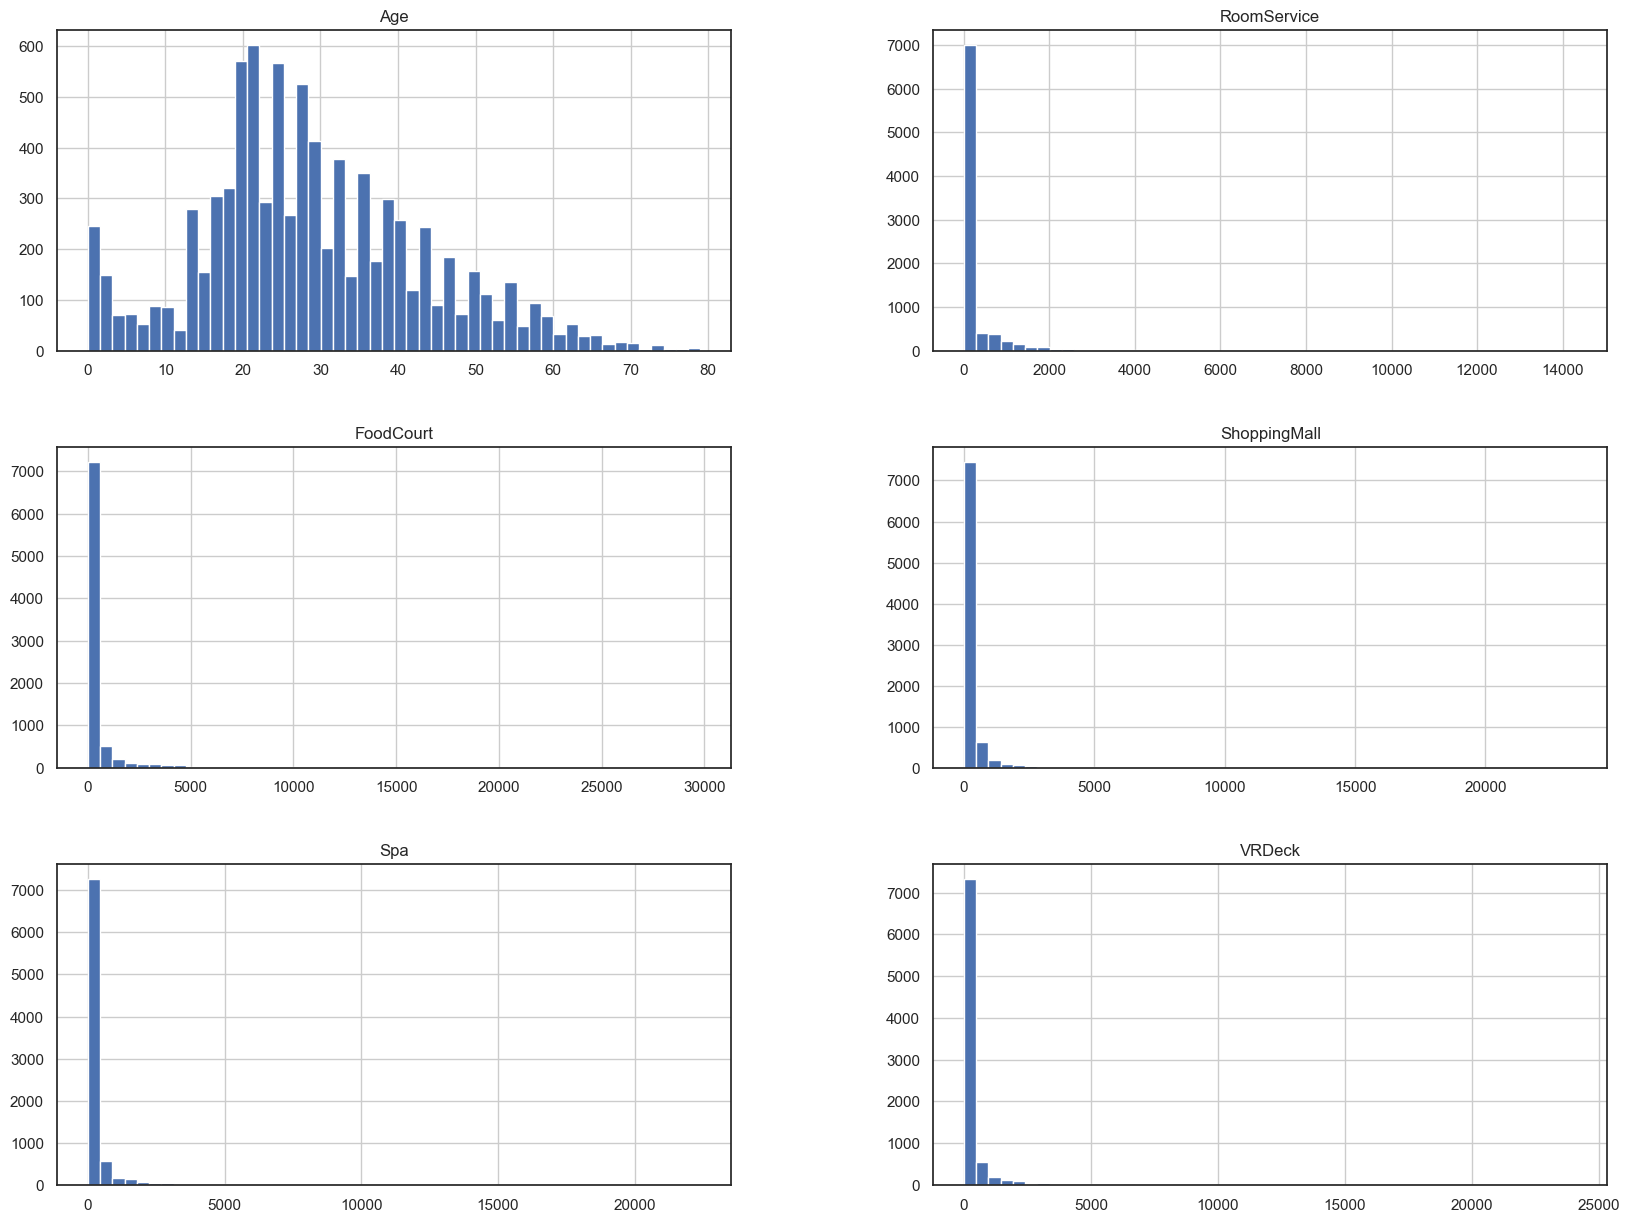

In [73]:
import	matplotlib.pyplot	as	plt
df.hist(bins=50,	figsize=(20,15))
plt.show()

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
SO, 

In [74]:
#gathering the categorical columns together
req_col = df.drop(columns=['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'])
print(req_col)

     PassengerId HomePlanet CryoSleep     Cabin    Destination    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  False   
...          ...        ...       ...       ...            ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  False   

                   Name  Transported  
0       Maham Ofracculy        False  
1          Juanna Vines         True  
2     

DATA TRANSFORMATION

In [111]:
negative_age_df = df[df['Age'] < 0]

# Display rows with negative Victim_Age values
negative_age_df

age = df['Age'].median()
df["Age"]= df['Age'].fillna(age)

BINARY ENCODING

In [112]:
# Convert True/False to 1/0
df['VIP'] = df['VIP'].astype(int )
df['CryoSleep'] = df['CryoSleep'].astype(int)
df['Transported'] = df['Transported'].astype(int)

print(df)

      PassengerId  HomePlanet  CryoSleep  Cabin  Destination  Age  VIP  \
0               0           1          0    149            2   39    0   
1               1           0          0   2184            2   24    0   
2               2           1          0      1            2   58    1   
3               3           1          0      1            2   33    0   
4               4           0          0   2186            2   16    0   
...           ...         ...        ...    ...          ...  ...  ...   
8688         8688           1          0    146            0   41    1   
8689         8689           0          1   5280            1   18    0   
8690         8690           0          0   5285            2   26    0   
8691         8691           1          0   2131            0   32    0   
8692         8692           1          0   2131            2   44    0   

      RoomService  FoodCourt  ShoppingMall   Spa  VRDeck  Name  Transported  \
0               0          0    

In [113]:
df['TotalSpent'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']
amt_spent = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpent']]
print(amt_spent)

      RoomService  FoodCourt  ShoppingMall   Spa  VRDeck  TotalSpent
0               0          0             0     0       0           0
1             109          9            25   456      44         643
2              43       1206             0  1273      49        2571
3               0        806           332  1132     187        2457
4             277         69           149   470       2         967
...           ...        ...           ...   ...     ...         ...
8688            0       1389             0   932      74        2395
8689            0          0             0     0       0           0
8690            0          0           972     1       0         973
8691            0        739             0   321    1113        2173
8692          124       1312             0     0      12        1448

[8693 rows x 6 columns]


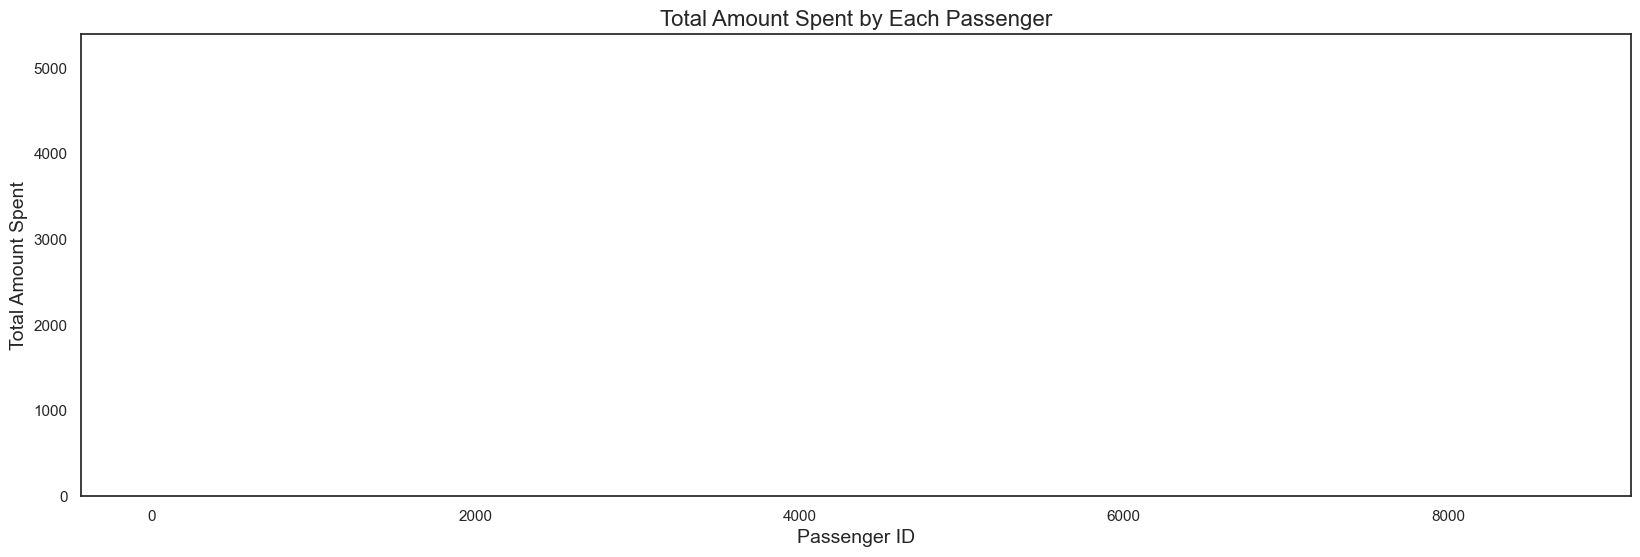

In [116]:
# Plotting the total amount spent by each individual
plt.figure(figsize=(20, 6))
plt.bar(df['PassengerId'], df['TotalSpent'], color='skyblue')

# Adding title and labels
plt.title('Total Amount Spent by Each Passenger', fontsize=16)
plt.xlabel('Passenger ID', fontsize=14)
plt.ylabel('Total Amount Spent', fontsize=14)

# Displaying the plot
plt.show()

In [118]:
print(df['TotalSpent'].max())
print(df['TotalSpent'].min())

5138
0


In [82]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'TotalSpent'],
      dtype='object')

In [85]:
req_col

PassengerId HomePlanet CryoSleep     Cabin    Destination    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  False   
...          ...        ...       ...       ...            ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  False   

                   Name  Transported  
0       Maham Ofracculy        False  
1          Juanna Vines         True  
2         Altark Susent        False  
3          Solam Susent        False  
4     Willy Santantines         True  
...                 ...          ...  
8688  Gravior Noxnuther        False  
8689    Kurta Mondalley        False  
8690       Fayey Connon         True  
8691   Celeon Hontichre        False  
8692   Propsh Hontichre         True  

[8693 rows x 8 columns]

Calculating the coorelation matric for the CATEGORICAL COLUMNS using `cramers_v` function which uses chi-square statistics

LABEL ENCODING

In [119]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data = pd.DataFrame() 

for i in df.columns :
  data[i]=label.fit_transform(df[i])

In [87]:
data.head()

PassengerId  HomePlanet  CryoSleep  Cabin  Destination  Age  VIP  \
0            0           1          0    149            2   39    0   
1            1           0          0   2184            2   24    0   
2            2           1          0      1            2   58    1   
3            3           1          0      1            2   33    0   
4            4           0          0   2186            2   16    0   

   RoomService  FoodCourt  ShoppingMall   Spa  VRDeck  Name  Transported  \
0            0          0             0     0       0  5252            0   
1          109          9            25   456      44  4502            1   
2           43       1206             0  1273      49   457            0   
3            0        806           332  1132     187  7149            0   
4          277         69           149   470       2  8320            1   

   TotalSpent  
0           0  
1         265  
2        2173  
3        1781  
4         553

In [88]:
df=data

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   PassengerId   8693 non-null   int32
 1   HomePlanet    8693 non-null   int32
 2   CryoSleep     8693 non-null   int32
 3   Cabin         8693 non-null   int32
 4   Destination   8693 non-null   int32
 5   Age           8693 non-null   int64
 6   VIP           8693 non-null   int32
 7   RoomService   8693 non-null   int64
 8   FoodCourt     8693 non-null   int64
 9   ShoppingMall  8693 non-null   int64
 10  Spa           8693 non-null   int64
 11  VRDeck        8693 non-null   int64
 12  Name          8693 non-null   int32
 13  Transported   8693 non-null   int32
 14  TotalSpent    8693 non-null   int64
dtypes: int32(8), int64(7)
memory usage: 747.2 KB


Building the Cramers-V function

In [120]:
from scipy.stats import chi2_contingency
import numpy as np
import scipy.stats as ss

def cramers_v(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

rows= []

# Build the matrix with debugging output
for var1 in data:
    col = []
    for var2 in data:
        try:
            # Create a confusion matrix for the two variables
            confusion_matrix = pd.crosstab(data[var1], data[var2])
            # Calculate Cramér's V
            cramers = cramers_v(confusion_matrix)
            col.append(round(cramers, 2))  # Round the result
        except Exception as e:
            print(f"Error processing {var1} vs {var2}: {e}")
            col.append(np.nan)  # Append NaN in case of error
    rows.append(col)


cramers_results = np.array(rows)
map = pd.DataFrame(cramers_results, columns = data.columns, index =data.columns)



map

Error processing PassengerId vs PassengerId: Unable to allocate 577. MiB for an array with shape (8693, 8693) and data type float64
Error processing PassengerId vs Cabin: Unable to allocate 435. MiB for an array with shape (8693, 6560) and data type float64
Error processing PassengerId vs Name: Unable to allocate 562. MiB for an array with shape (8693, 8474) and data type float64
Error processing Cabin vs PassengerId: Unable to allocate 435. MiB for an array with shape (6560, 8693) and data type float64


PassengerId  HomePlanet  CryoSleep  Cabin  Destination   Age  \
PassengerId           NaN         NaN        NaN    NaN          NaN   NaN   
HomePlanet            NaN        1.00       0.11   0.46         0.26  0.21   
CryoSleep             NaN        0.11       1.00   0.00         0.12  0.14   
Cabin                 NaN        0.46       0.00   1.00         0.18  0.00   
Destination           NaN        0.26       0.12   0.18         1.00  0.04   
Age                   inf        0.21       0.14   0.00         0.04  1.00   
VIP                   NaN        0.17       0.08   0.00         0.04  0.14   
RoomService           NaN        0.24       0.36   0.30         0.00  0.00   
FoodCourt             NaN        0.20       0.34   0.00         0.00  0.00   
ShoppingMall          NaN        0.18       0.37   0.31         0.00  0.00   
Spa                   NaN        0.14       0.40   0.07         0.00  0.13   
VRDeck                NaN        0.15       0.37   0.03         0.00  0.00   
Name                  NaN        0.05       0.03   0.00         0.03  0.00   
Transported           inf        0.19       0.46   0.18         0.11  0.14   
TotalSpent            NaN        0.40       0.72   0.12         0.10  0.09   

               VIP  RoomService  FoodCourt  ShoppingMall   Spa  VRDeck  Name  \
PassengerId    NaN          inf        NaN           NaN   NaN     inf   NaN   
HomePlanet    0.17         0.24       0.20          0.18  0.14    0.15  0.05   
CryoSleep     0.08         0.36       0.34          0.37  0.40    0.37  0.03   
Cabin         0.00         0.30       0.00          0.31  0.07    0.03  0.00   
Destination   0.04         0.00       0.00          0.00  0.00    0.00  0.03   
Age           0.14         0.00       0.00          0.00  0.13    0.00  0.00   
VIP           1.00         0.30       0.52          0.22  0.40    0.45  0.10   
RoomService   0.30         1.00       0.00          0.38  0.16    0.05  0.00   
FoodCourt     0.52         0.00       1.00          0.14  0.49    0.52  0.10   
ShoppingMall  0.22         0.38       0.14          1.00  0.19    0.08  0.00   
Spa           0.40         0.16       0.49          0.19  1.00    0.42  0.00   
VRDeck        0.45         0.05       0.52          0.08  0.42    1.00  0.07   
Name          0.10         0.00       0.10          0.00  0.00    0.07  1.00   
Transported   0.03         0.28       0.26          0.27  0.27    0.25  0.01   
TotalSpent    0.55         0.45       0.59          0.45  0.56    0.55  0.03   

              Transported  TotalSpent  
PassengerId           inf         NaN  
HomePlanet           0.19        0.40  
CryoSleep            0.46        0.72  
Cabin                0.18        0.12  
Destination          0.11        0.10  
Age                  0.14        0.09  
VIP                  0.03        0.55  
RoomService          0.28        0.45  
FoodCourt            0.26        0.59  
ShoppingMall         0.27        0.45  
Spa                  0.27        0.56  
VRDeck               0.25        0.55  
Name                 0.01        0.03  
Transported          1.00        0.45  
TotalSpent           0.45        1.00

Adding a heatmap to the matrix

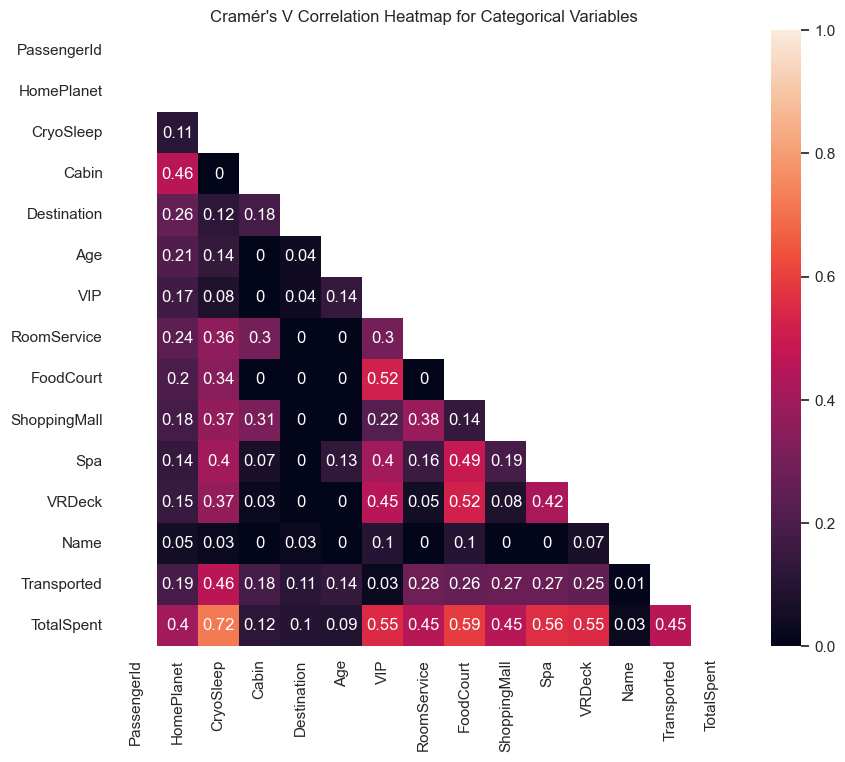

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt



mask = np.zeros_like(map, dtype=bool)
mask[np.triu_indices_from(mask)] = True




with sns.axes_style("white"):
  plt.figure(figsize=(10, 8))
  plt.title("Cramér's V Correlation Heatmap for Categorical Variables")
  ax = sns.heatmap(map, annot=True,mask=mask,vmin=0., vmax=1, square=True)

plt.show()

In [124]:
# Get value counts for CryoSleep column
cryosleep_counts = data['CryoSleep'].value_counts()
cryosleep_counts

CryoSleep
0    5656
1    3037
Name: count, dtype: int64

Passengers in cryosleep are confined to their cabins else are not.

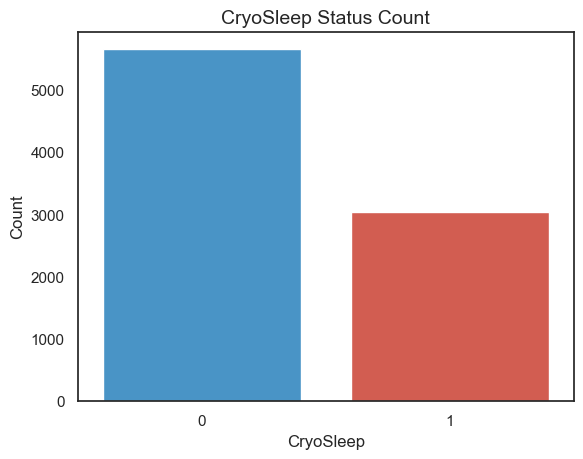

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting a bar graph for CryoSleep counts
sns.barplot(x=cryosleep_counts.index, y=cryosleep_counts.values, palette=["#3498db", "#e74c3c"])  # Blue and Red

# Labeling
plt.xlabel('CryoSleep', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('CryoSleep Status Count', fontsize=14)

# Display the plot
plt.show()


In [126]:
y = df['Transported']
X = df.drop('Transported',axis=1)
print(df.shape, y.shape)
print(test.shape)

(8693, 15) (8693,)
(4277, 13)


In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X train shape : ", X_train.shape)
print("X test shape : ", X_test.shape)
print("y train shape : ", y_train.shape)
print("y test shape : ", y_test.shape)

X train shape :  (6954, 14)
X test shape :  (1739, 14)
y train shape :  (6954,)
y test shape :  (1739,)


we are going to use seaborn plot

Before violin and swarm plot we need to normalization or standirdization.
The green and coral sections correspond to the Transported variable, which has values of 0 and 1. This indicates whether a passenger was transported or not
#0 (not transported) is represented with light green.
#1 (transported) is represented with light coral.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'PassengerId'),
  Text(1, 0, 'HomePlanet'),
  Text(2, 0, 'CryoSleep'),
  Text(3, 0, 'Cabin'),
  Text(4, 0, 'Destination'),
  Text(5, 0, 'Age'),
  Text(6, 0, 'VIP'),
  Text(7, 0, 'RoomService'),
  Text(8, 0, 'FoodCourt'),
  Text(9, 0, 'ShoppingMall')])

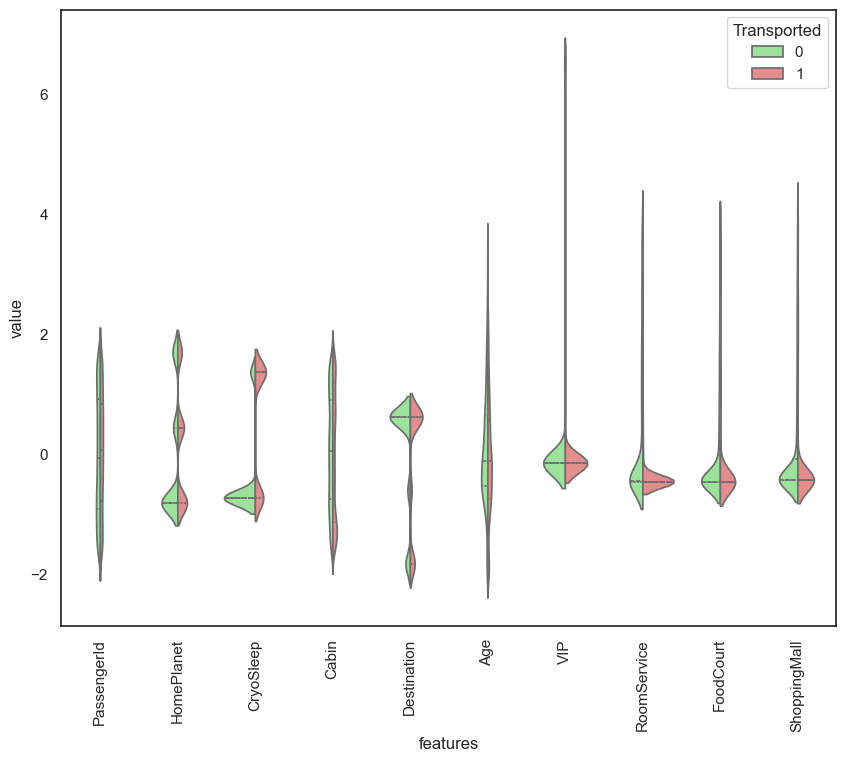

In [129]:
# first ten features
import seaborn as sns
data_dia = y
data = X
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="Transported",
                    var_name="features",
                    value_name='value')

palette_colors = {0: "lightgreen", 1: "lightcoral"} 
plt.figure(figsize=(10,8))
sns.violinplot(x="features", y="value", hue="Transported", data=data,split=True, inner="quart", palette=palette_colors)
plt.xticks(rotation=90)

Features like<br>
> HomePlanet :- shows the distribution of passengers from different home planets.<br>
> CryoSleep:- Has distinct separation in the distribution. Plot shows there may be a strong correlation between passengers who were in cryosleep and whether they were transported<br>
> Destination:- It could be a predictive feature similar to HomePlanet<br>
**Hence, these features may have predictive power.**<br>
AND<br>
> RoomService, FoodCourt, ShoppingMall:- These features have more concentrated distributions, but the overlap between Transported = 0 and 1 is high. <br>
**This could mean that these features have less predictive power for determining if a passenger was transported.**<br>

([0, 1, 2],
 [Text(0, 0, 'VRDeck'), Text(1, 0, 'Name'), Text(2, 0, 'TotalSpent')])

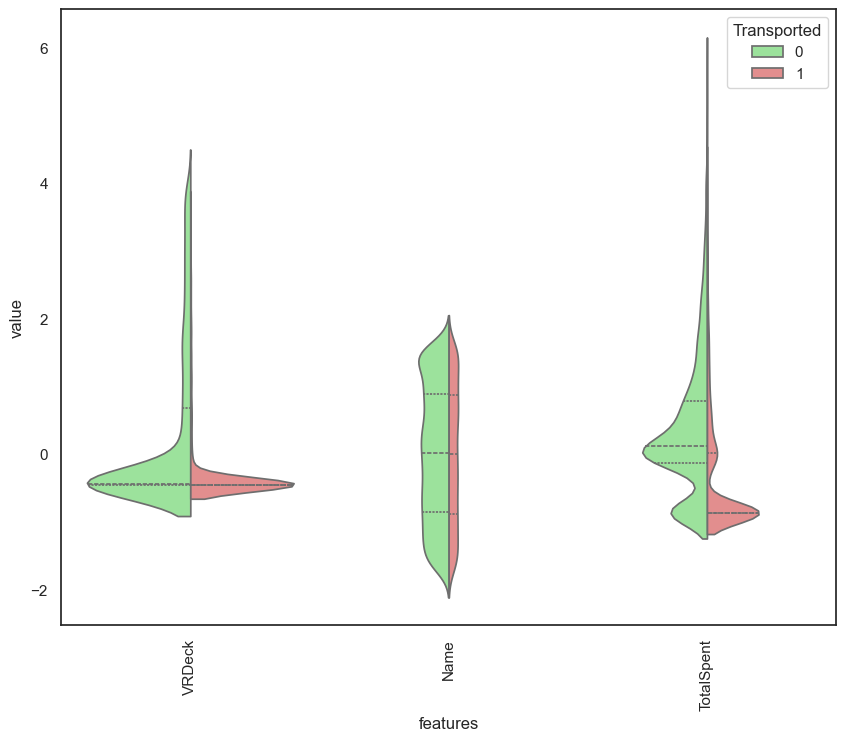

In [130]:
# first ten features
import seaborn as sns
data_dia = y
data = X
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,11:15]],axis=1)
data = pd.melt(data,id_vars="Transported",
                    var_name="features",
                    value_name='value')

palette_colors = {0: "lightgreen", 1: "lightcoral"} 
plt.figure(figsize=(10,8))
sns.violinplot(x="features", y="value", hue="Transported", data=data,split=True, inner="quart", palette=palette_colors)
plt.xticks(rotation=90)

Take-aways
1. Passengers who were transported (1) generally have a lower spread and density around the lower spend values compared to those not transported (0).
2. Passengers who were transported show a wider range of spending on VRDeck services, indicating higher and more variable expenditure compared to others.

PAIR-PLOT
visualizing the relationships between three variables: 'CryoSleep', 'HomePlanet', and 'Destination'.

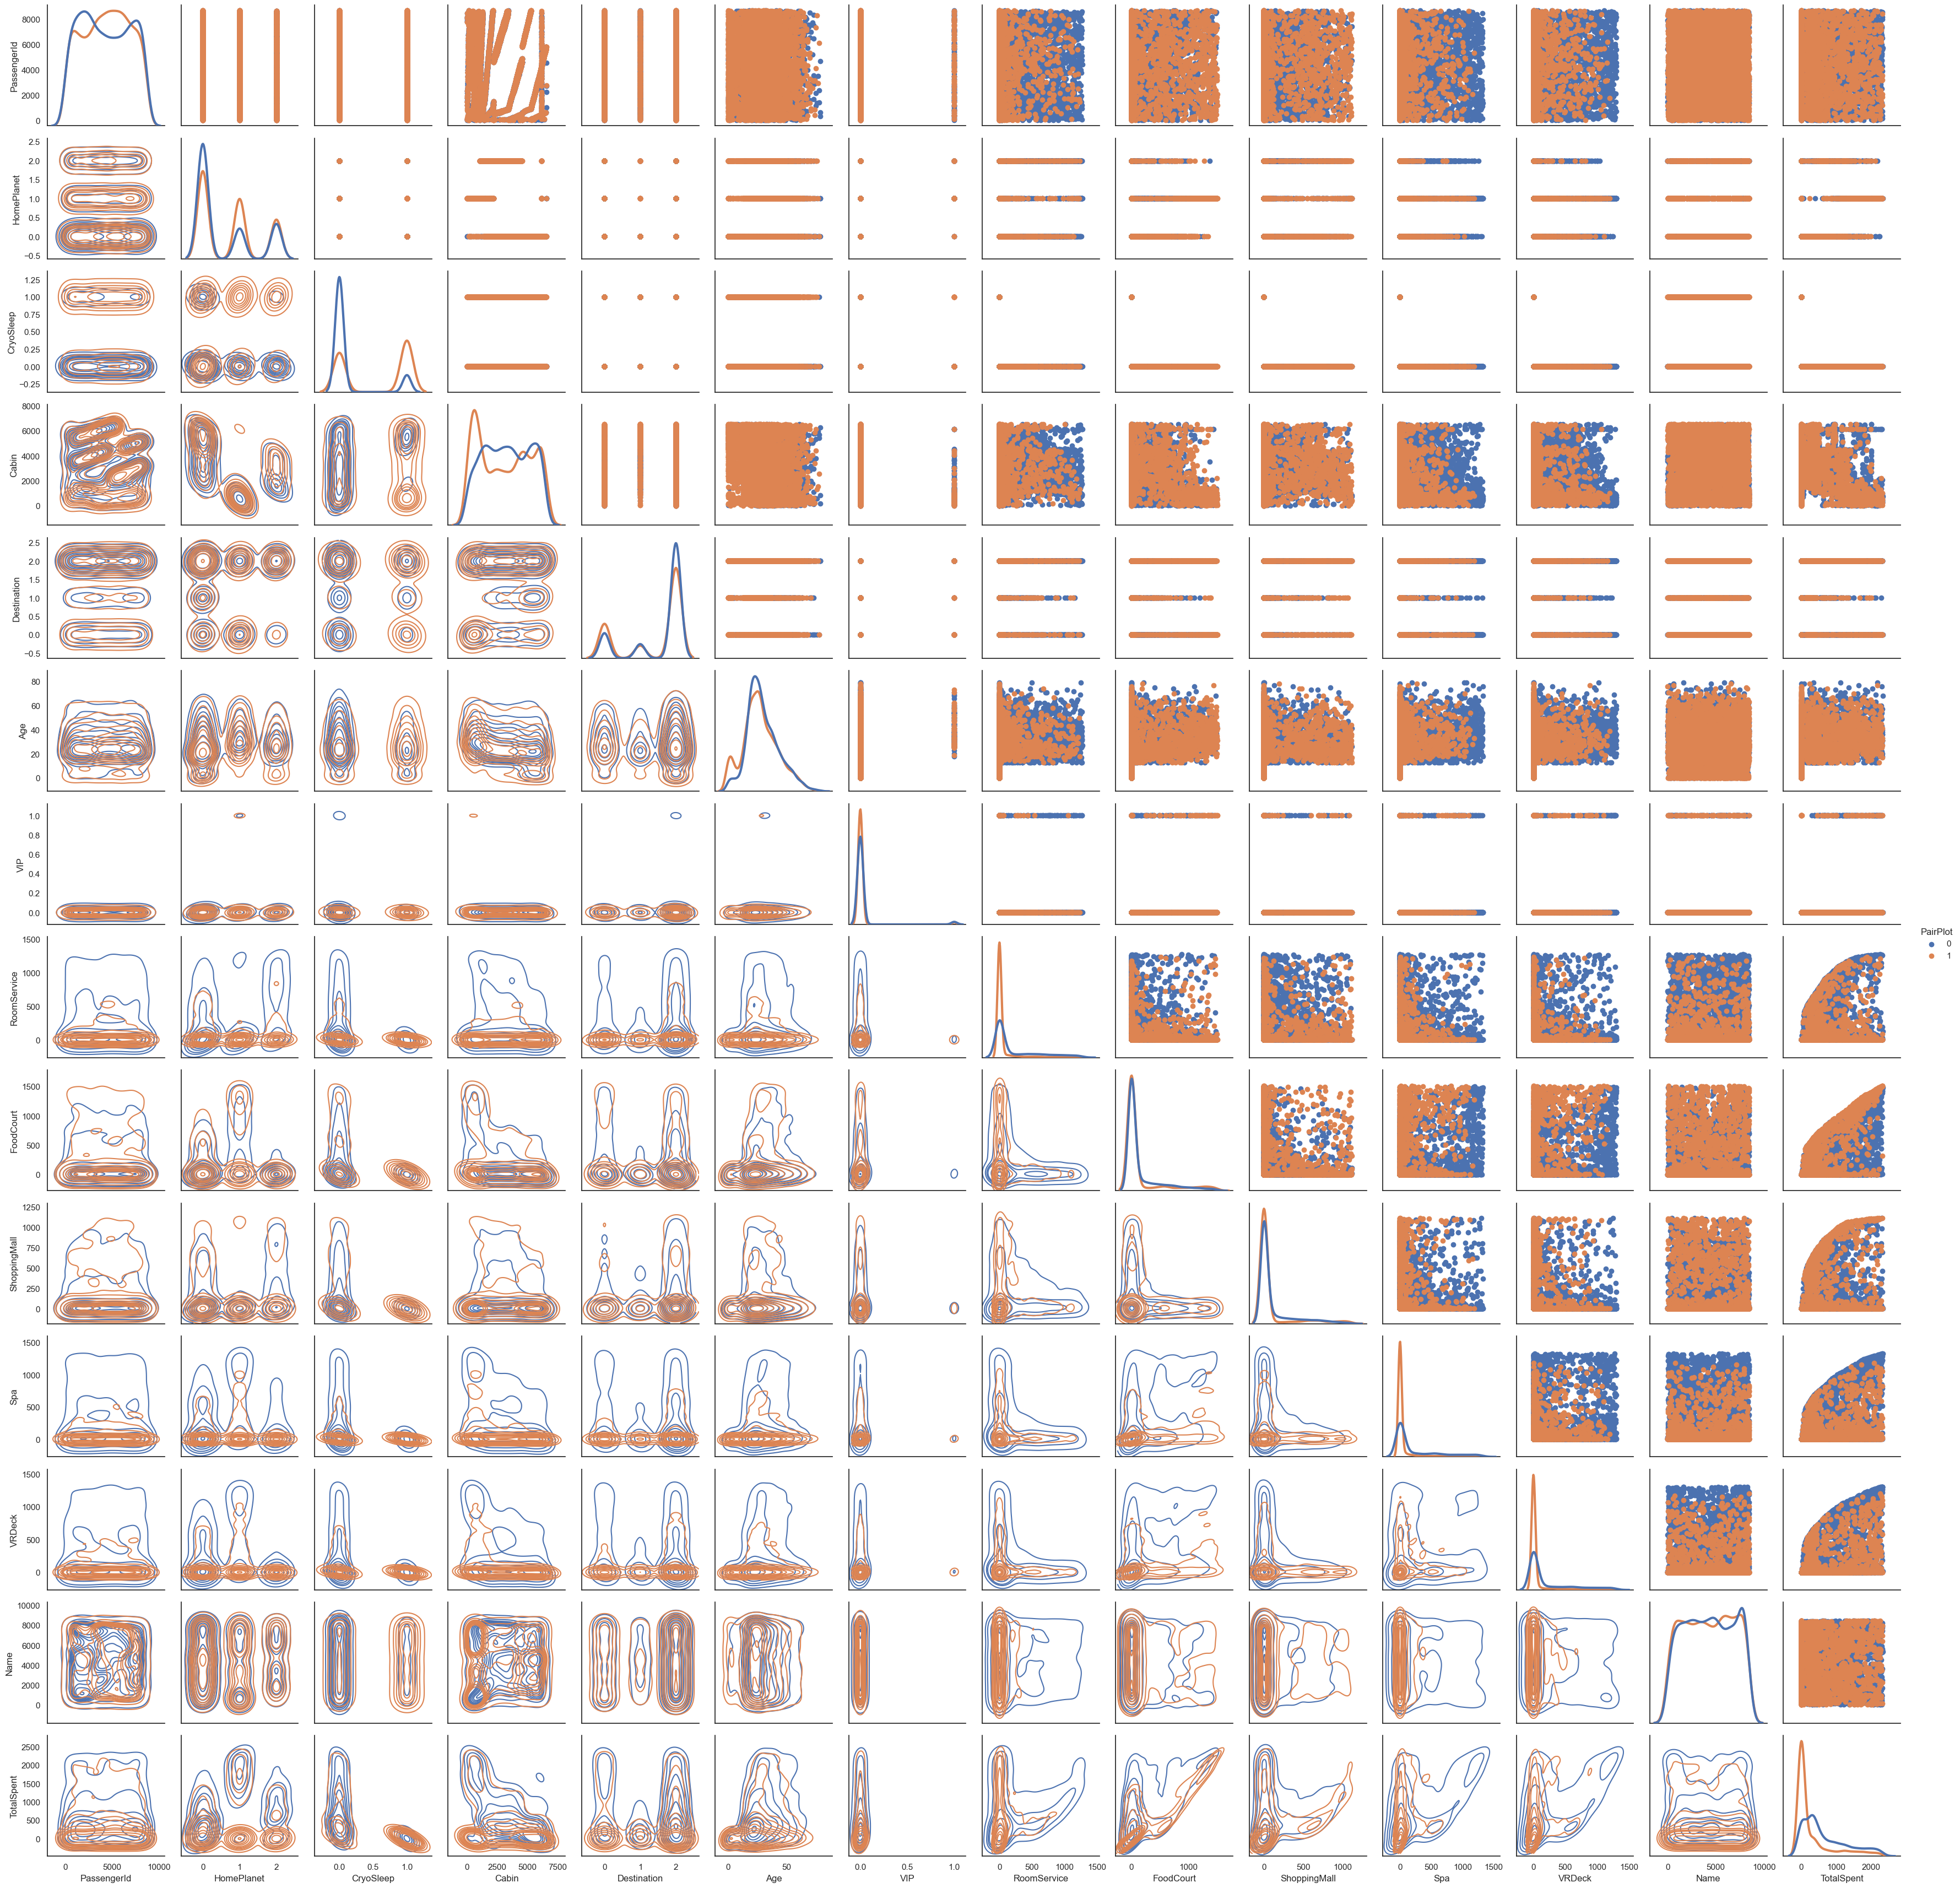

In [105]:
sns.set(style="white")
#df = X.loc[:,['CryoSleep','HomePlanet','Destination']]
g = sns.PairGrid(df, diag_sharey=False,  hue="Transported")
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(plt.hist, lw=3)
g.add_legend(title="PairPlot", adjust_subtitles=True)

CryoSleep is a popular choice: The significant number of passengers using CryoSleep highlights its potential advantages during space travel.<n>
Earth is the dominant home planet: The majority of passengers originate from Earth, suggesting the ship's departure point.<n>
Passengers from Earth have a preferred destination: The strong clustering in the HomePlanet vs. Destination plot indicates that a specific destination is likely a popular choice among passengers from Earth.<n>

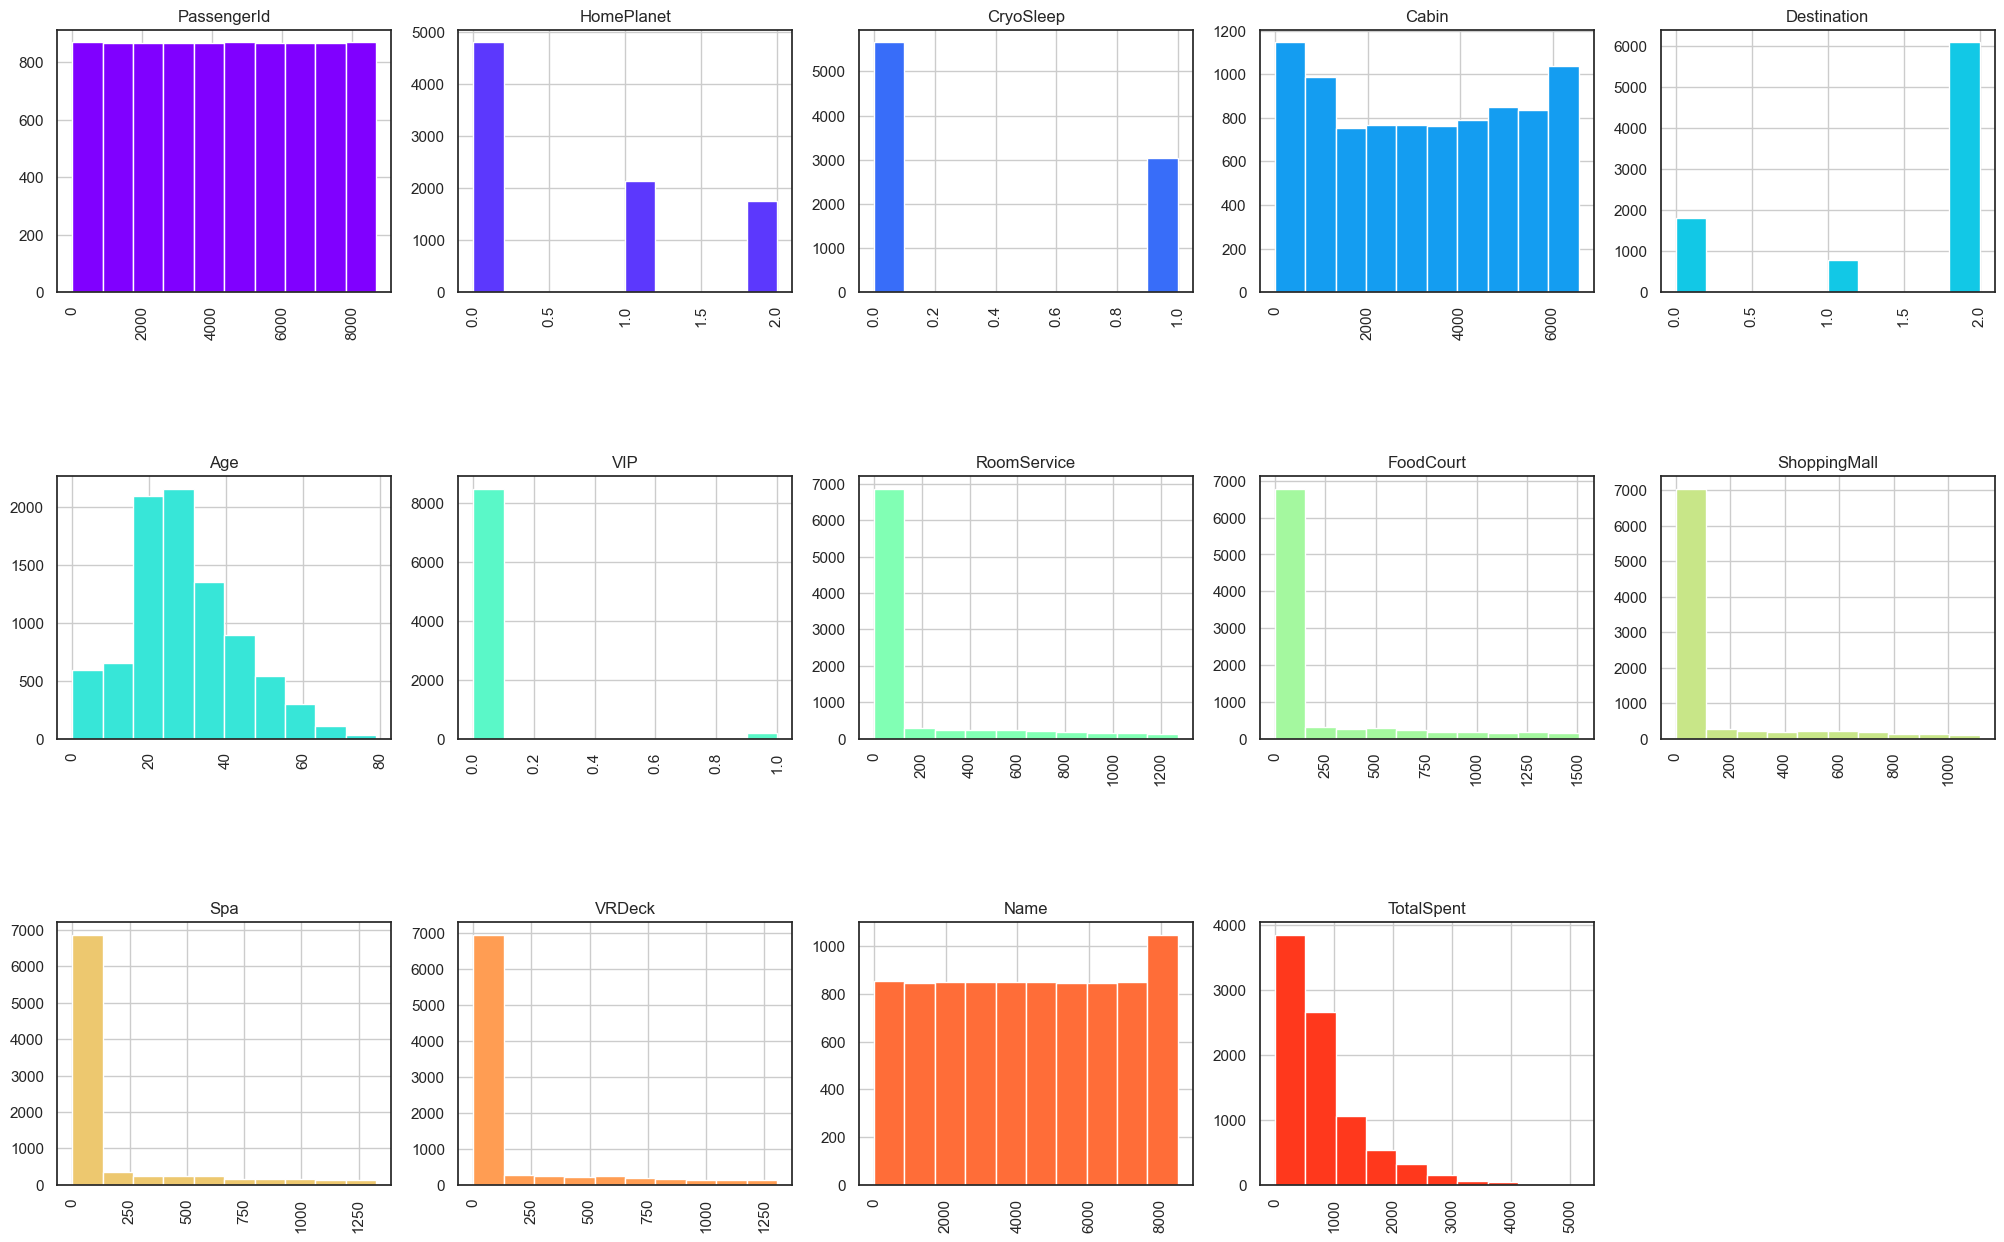

In [131]:
import matplotlib.cm as cm

fig = plt.figure(figsize=(25, 15))
cols = 5
rows = np.ceil(float(X.shape[1]) / cols)
rows= int(rows)

# Define the colormap
cmap = cm.get_cmap('rainbow') 
num_plots = X.shape[1]
colors = [cmap(i/num_plots) for i in range(num_plots)] 



for i, column in enumerate(X.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if X.dtypes[column] == object:
        X_train[column].value_counts().plot(kind="bar", axes=ax,  color=colors[i])
    else:
        X[column].hist(axes=ax, color=colors[i])
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

#PREPROCESSING

Binary Classification Algorithms:
Logistic Regression
Support Vector Machines (SVMs)
Decision Trees
Random Forests
Naive Bayes

K-Nearest Neighbors (KNN) imputation finds the most similar instances and imputes the missing value based on their values.
###BooleanImputation
###KNN-IMPUTATION

In [133]:
from sklearn.impute import KNNImputer

# Initialize the imputer
imputer = KNNImputer(n_neighbors=5)

# Apply KNN Imputation
df[['CryoSleep', 'VIP','Transported']] = imputer.fit_transform(df[['CryoSleep', 'VIP','Transported']])


###MEDIAN IMPUTATION 
for columns having prices as this is more robust especially if the data  is skewed.

In [135]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore',)


# Fill missing values with the median

df['RoomService'].fillna(df['RoomService'].median(), inplace=True)
df['FoodCourt'].fillna(df['FoodCourt'].median(), inplace=True)
df['ShoppingMall'].fillna(df['ShoppingMall'].median(), inplace=True)
df['Spa'].fillna(df['Spa'].median(), inplace=True)
df['VRDeck'].fillna(df['VRDeck'].median(), inplace=True)

Fill missing values with the mode

In [139]:
df['HomePlanet'].fillna(df['HomePlanet'].mode()[0], inplace=True) 
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True) 
df['Destination'].fillna(df['Destination'].mode()[0], inplace=True)

In [136]:
# Fill missing values with a placeholder
df['Name'].fillna('Unknown', inplace=True)

Splitting the Dataset

In [197]:
y = df['Transported']
X = df.drop('Transported',axis=1)
print(df.shape, y.shape)
print(test.shape)

(8693, 15) (8693,)
(4277, 13)


In [207]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X train shape : ", X_train.shape)
print("X test shape : ", X_test.shape)
print("y train shape : ", y_train.shape)
print("y test shape : ", y_test.shape)

X train shape :  (6954, 14)
X test shape :  (1739, 14)
y train shape :  (6954,)
y test shape :  (1739,)


In [208]:
X_train.head()

PassengerId  HomePlanet  CryoSleep  Cabin  Destination  Age  VIP  \
2333         2333           0        0.0   6156            2   28  0.0   
2589         2589           0        0.0   3952            2   17  0.0   
8302         8302           1        1.0    932            0   28  0.0   
8177         8177           2        0.0   3333            2   20  0.0   
500           500           1        1.0    719            0   36  0.0   

      RoomService  FoodCourt  ShoppingMall  Spa  VRDeck  Name  TotalSpent  
2333            0         55             0  535       0  5071         590  
2589            0        779            31    0       0  2013         810  
8302            0          0             0    0       0   426           0  
8177            0          2           267  739       0  7875        1008  
500             0          0             0    0       0    36           0

In [209]:
cat_col =req_col 

In [210]:
num_col = amt_spent.join(df[['Age']], how='left') 
print(num_col)

      RoomService  FoodCourt  ShoppingMall   Spa  VRDeck  TotalSpent  Age
0               0          0             0     0       0           0   39
1             109          9            25   456      44         643   24
2              43       1206             0  1273      49        2571   58
3               0        806           332  1132     187        2457   33
4             277         69           149   470       2         967   16
...           ...        ...           ...   ...     ...         ...  ...
8688            0       1389             0   932      74        2395   41
8689            0          0             0     0       0           0   18
8690            0          0           972     1       0         973   26
8691            0        739             0   321    1113        2173   32
8692          124       1312             0     0      12        1448   44

[8693 rows x 7 columns]


In [211]:
num_col.columns

Index(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'TotalSpent', 'Age'],
      dtype='object')

In [212]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [213]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer

#converting X_train and X_test to a DataFrame
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train)
if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test) 

ct = make_column_transformer(
    (MinMaxScaler(),['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','TotalSpent', 'Age' ]),
    (StandardScaler(), ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','TotalSpent', 'Age']),
    remainder='passthrough'
)

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

Best parameters: {'C': 0.7, 'class_weight': {1: 0.6, 0: 0.4}, 'penalty': 'l2', 'solver': 'liblinear'}

In [221]:
from sklearn.linear_model import LogisticRegression


lr_clf = LogisticRegression(solver='liblinear', C=0.7, class_weight={1: 0.6, 0: 0.4}, penalty='l2')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 77.97%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.844692     0.736198  0.779695     0.790445      0.790086
recall        0.681818     0.876286  0.779695     0.779052      0.779695
f1-score      0.754566     0.800157  0.779695     0.777361      0.777512
support    3454.000000  3500.000000  0.779695  6954.000000   6954.000000
_______________________________________________
Confusion Matrix: 
 [[2355 1099]
 [ 433 3067]]

Test Result:
Accuracy Score: 77.00%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy    macro avg  weighted avg
precision    0.834543    0.727619  0.769983     0.781081      0.780558
recall       0.667828    0.870159  0.769983     0.768994      0.769983
f1-score     0.741935    0.792531  0.769983     0.767233      0.767481
support    861.000000  878.000000  0.769

In [215]:
from sklearn.ensemble import RandomForestClassifier


rf_clf = RandomForestClassifier(n_estimators=1000)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0.0     1.0  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    3454.0  3500.0       1.0     6954.0        6954.0
_______________________________________________
Confusion Matrix: 
 [[3454    0]
 [   0 3500]]

Test Result:
Accuracy Score: 78.67%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy    macro avg  weighted avg
precision    0.787559    0.785795  0.786659     0.786677      0.786668
recall       0.779326    0.793850  0.786659     0.786588      0.786659
f1-score     0.783421    0.789802  0.786659     0.786611      0.786642
support    861.000000  878.000000  0.786659  1739.000000   1739.000000
____________________________

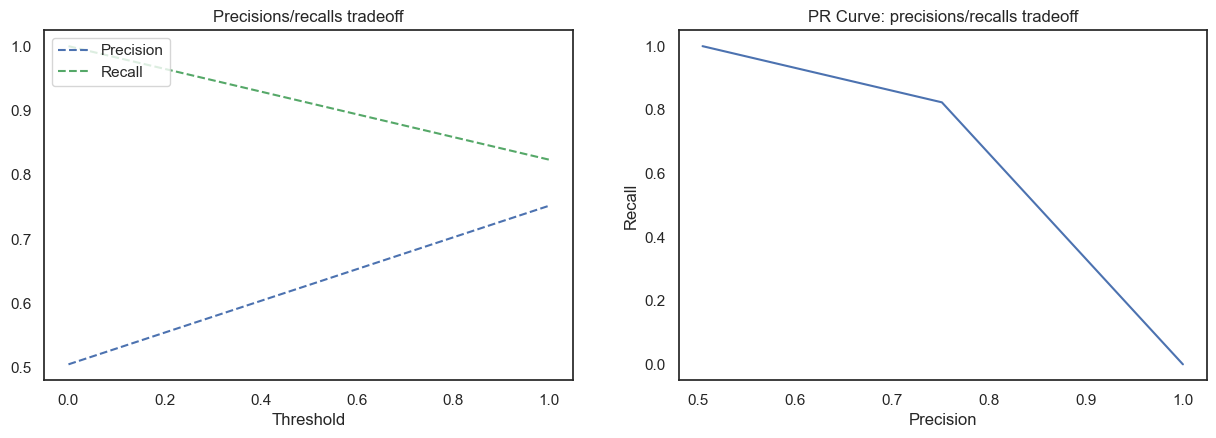

In [216]:
from sklearn.metrics import precision_recall_curve


def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precisions/recalls tradeoff")

    
precisions, recalls, thresholds = precision_recall_curve(y_test, lr_clf.predict(X_test))


plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(2, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

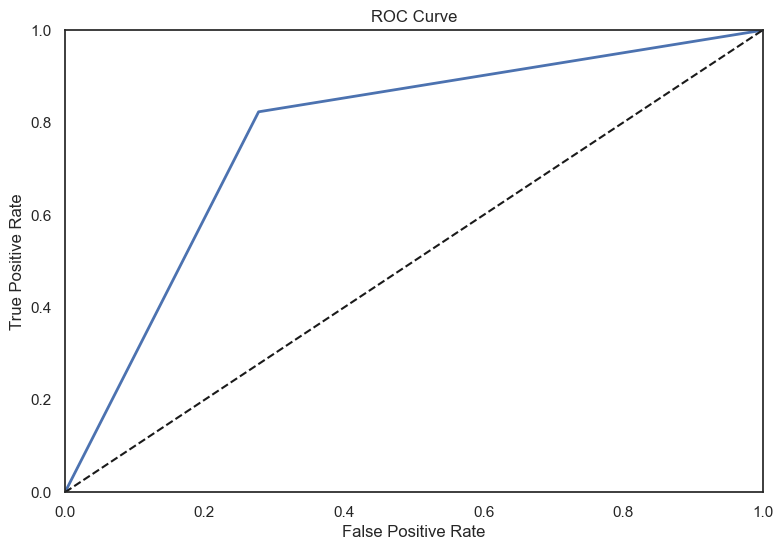

In [217]:
from sklearn.metrics import roc_curve


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict(X_test))
plt.figure(figsize=(9,6)); 
plot_roc_curve(fpr, tpr)
plt.show();

In [218]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, lr_clf.predict(X_test))

0.7729391050825576

In [219]:
from sklearn.model_selection import GridSearchCV


lr_clf = LogisticRegression()

penalty = ['l1', 'l2']
C = [0.5, 0.6, 0.7, 0.8]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']

param_grid = dict(
    penalty=penalty, 
    C=C, 
    class_weight=class_weight, 
    solver=solver
)

lr_cv = GridSearchCV(
    estimator=lr_clf, 
    param_grid=param_grid, 
    scoring='f1',
    verbose=1, 
    n_jobs=-1, 
    cv=10
)

lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")

lr_clf = LogisticRegression(**best_params)
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
Best parameters: {'C': 0.7, 'class_weight': {1: 0.6, 0: 0.4}, 'penalty': 'l2', 'solver': 'liblinear'}
Train Result:
Accuracy Score: 77.97%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.844692     0.736198  0.779695     0.790445      0.790086
recall        0.681818     0.876286  0.779695     0.779052      0.779695
f1-score      0.754566     0.800157  0.779695     0.777361      0.777512
support    3454.000000  3500.000000  0.779695  6954.000000   6954.000000
_______________________________________________
Confusion Matrix: 
 [[2355 1099]
 [ 433 3067]]

Test Result:
Accuracy Score: 77.00%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy    macro avg  weighted avg
precision    0.834543    0.727619  0.769983     0.781081      0.780558
recall       0.66